In [1]:
pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow streamlit


Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas as pd

#stock and date range
ticker = 'AAPL'
start = '2015-01-01'
end = '2025-07-14'

#historical stock data
df = yf.download(ticker, start=start, end=end)

# We will use just the 'Close' price
df = df[['Close']]
# Optional: reset index to move 'Date' from index to column
df.reset_index(inplace=True)

# Rename columns if necessary
df.columns = ['Date', 'Close']
df.tail()

/tmp/ipykernel_247/3582893697.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start, end=end)
[*********************100%***********************]  1 of 1 completed


,Date,Close
2641,2025-07-07,209.949997
2642,2025-07-08,210.009995
2643,2025-07-09,211.139999
2644,2025-07-10,212.410004
2645,2025-07-11,211.160004


In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = df[['Close']]

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
X = []
y = []
sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-60:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)  # (num_samples, 60, 1)
print("y shape:", y.shape)  # (num_samples, 1)             


X shape: (2586, 60, 1)
y shape: (2586, 1)


In [4]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# 1. Define the LSTM model architecture
model = Sequential()

# LSTM Layer 1
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Prevent overfitting

# LSTM Layer 2
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# LSTM Layer 3
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer — predict 1 value (next day's price)
model.add(Dense(units=1))

# 2. Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# 3. Train the model
history = model.fit(X, y, epochs=20, batch_size=32)


2025-07-22 13:21:05.223666: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-22 13:21:05.230096: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-22 13:21:05.250017: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1753190465.284148     247 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1753190465.294742     247 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1753190465.322659     247 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/20


2025-07-22 13:21:10.969547: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/d376d39a-d054-4473-9ed3-5c7c9b3046a1/.local/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - loss: 0.0337
Epoch 2/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0029
Epoch 3/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - loss: 0.0024
Epoch 4/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0025
Epoch 5/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step - loss: 0.0023
Epoch 6/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0022
Epoch 7/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0018
Epoch 8/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0017
Epoch 9/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0021
Epoch 10/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 97ms/step - loss: 0.0017
Epoch 11/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - loss: 0.0017
Epoch 12/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - loss: 0.0018
Epoch 13/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0017
Epoch 14/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0016
Epoch 15/20
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - loss: 0.0016
Epoch 16/20
81

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step


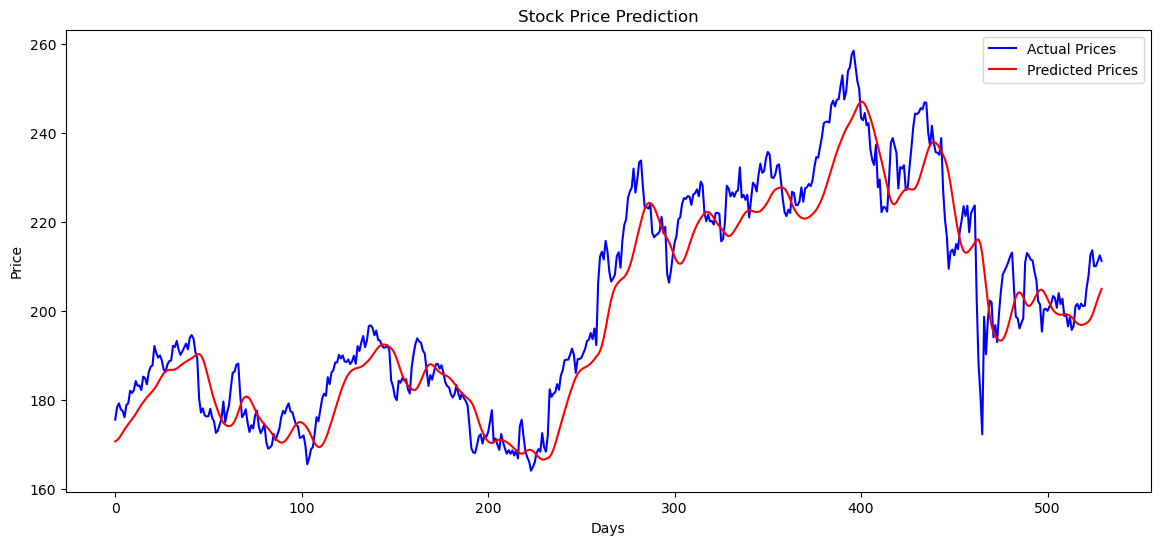

In [5]:
import matplotlib.pyplot as plt

# STEP 1: Split the scaled data
training_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:training_size]
test_data = scaled_data[training_size - 60:]  # keep 60 extra for sequences

# STEP 2: Create sequences for testing
X_test = []
y_test = []

for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i])
    y_test.append(test_data[i])

X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# STEP 3: Predict using trained model
predicted_prices = model.predict(X_test)

# STEP 4: Inverse scale (to get real price values)
predicted_prices = scaler.inverse_transform(predicted_prices)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

# STEP 5: Plot predictions vs actual prices
plt.figure(figsize=(14, 6))
plt.plot(actual_prices, color='blue', label='Actual Prices')
plt.plot(predicted_prices, color='red', label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()
